In [37]:
import pandas as pd

# !git clone https://github.com/taehojo/data.git

In [38]:
#Pandas로 데이터 읽기
df_iris = pd.read_csv('./data/iris3.csv')

#head()로 데이터 확인하기
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


붓꽃데이터 컬럼 정보 :
1. sepal_length, width : 꽃받침의 길이, 너비 정보
2. peta_length, width : 꽃잎의 길이, 너비 정보

### 1. head(), value_counts(), describe()로 데이터 확인하기

In [39]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
#value_counts()로 데이터 확인하기
df_iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [41]:
df_iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [42]:
#describe()로 데이터 확인하기
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Seaborn 라이브러리를 사용하여 정보간 상관관계 그래프 그리기

In [43]:
df_iris_num = df_iris.drop(['species'], axis=1)
df_iris_num.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


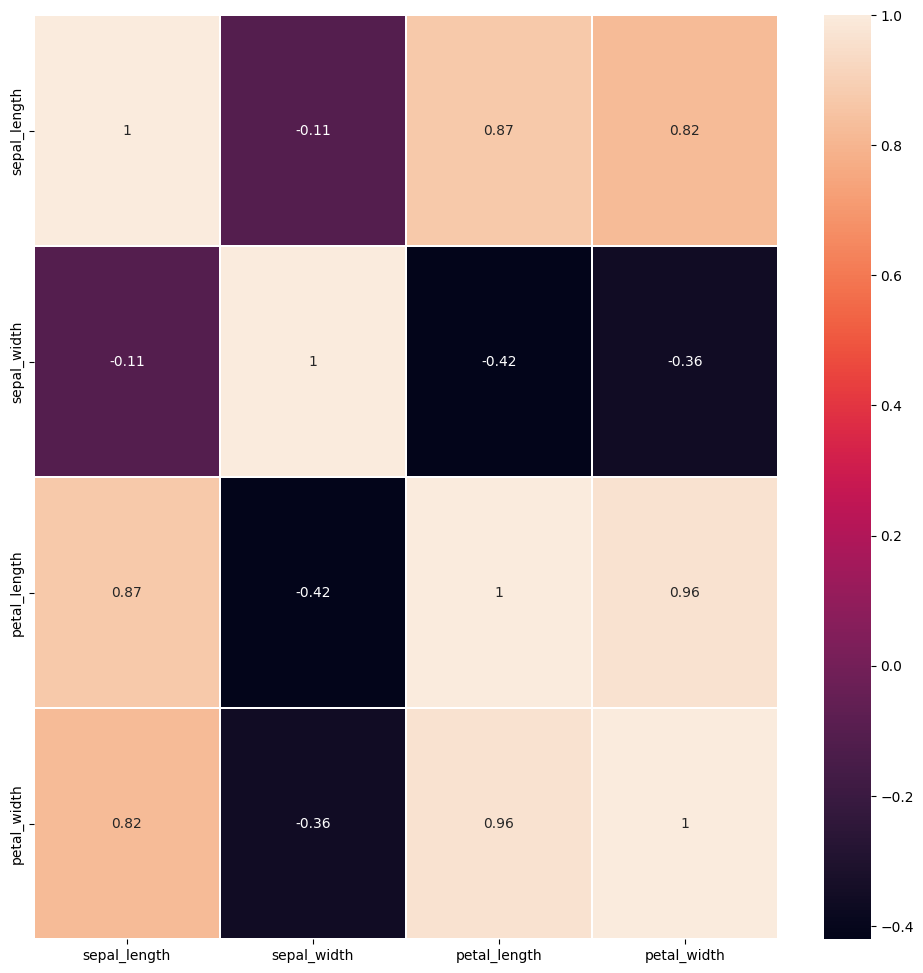

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

#상관관계 그래프 그리기
sns.heatmap(df_iris_num.corr(), linewidths=0.1, vmax=1, linecolor='white', annot=True)
plt.show()


### 3. 상관관계가 높은 항목을 histogram으로 어떻게 분포되는지 그려보기

(array([[ 0.,  0.,  2., 21., 25.,  2.,  0.,  0.,  1.,  4.,  3., 11., 18.,
         12., 17.,  9., 12.,  7.,  2.,  4.],
        [48.,  2., 10., 26., 30., 17., 14.,  3.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ,
        3.84, 4.18, 4.52, 4.86, 5.2 , 5.54, 5.88, 6.22, 6.56, 6.9 ]),
 <a list of 2 BarContainer objects>)

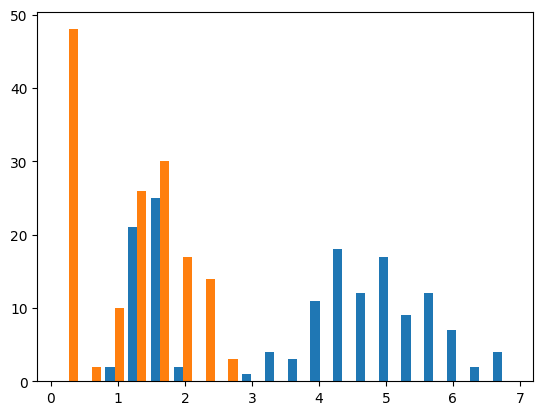

In [45]:
plt.hist(x=[df_iris['petal_length'], df_iris['petal_width']], bins=20)

In [46]:
#petal_length와 petal_width MinMax 정규화하기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_iris[['petal_length', 'petal_width']] = scaler.fit_transform(df_iris[['petal_length', 'petal_width']])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,0.067797,0.041667,Iris-setosa
1,4.9,3.0,0.067797,0.041667,Iris-setosa
2,4.7,3.2,0.050847,0.041667,Iris-setosa
3,4.6,3.1,0.084746,0.041667,Iris-setosa
4,5.0,3.6,0.067797,0.041667,Iris-setosa


(array([[ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
         17.,  6., 12.,  7.,  4.,  2.,  3.],
        [34.,  7.,  7.,  1.,  1.,  0.,  0.,  7.,  3.,  5., 21., 12.,  4.,
          2., 12., 11.,  6.,  3.,  8.,  6.]]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 2 BarContainer objects>)

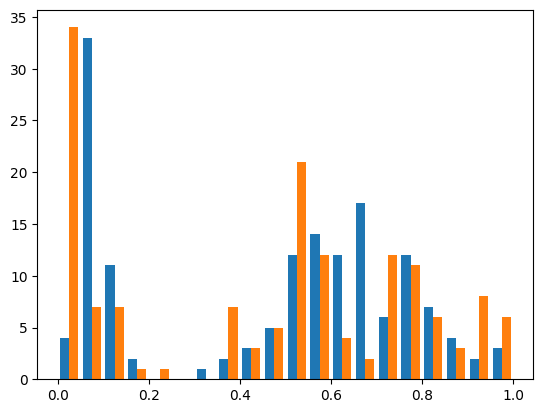

In [47]:
plt.hist(x=[df_iris['petal_length'], df_iris['petal_width']], bins=20)

#### 종별 width, length 차이 히스토그램으로 시각화하기

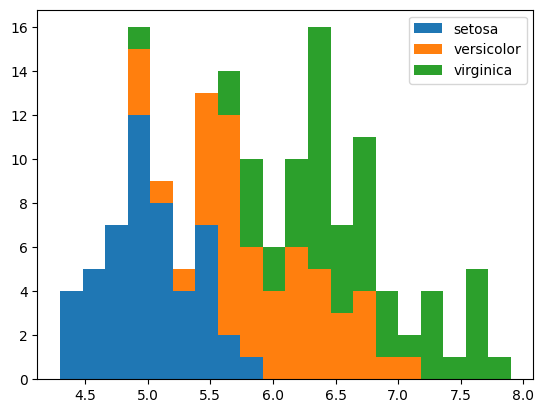

In [48]:
df_iris['species_encoded'] = pd.factorize(df_iris['species'])[0]

plt.hist(x=[df_iris.sepal_length[df_iris['species_encoded'] == 0],
            df_iris.sepal_length[df_iris['species_encoded'] == 1],
            df_iris.sepal_length[df_iris['species_encoded'] == 2]
            ],
         histtype='barstacked',
         label=['setosa', 'versicolor', 'virginica'],
         bins=20)
plt.legend()

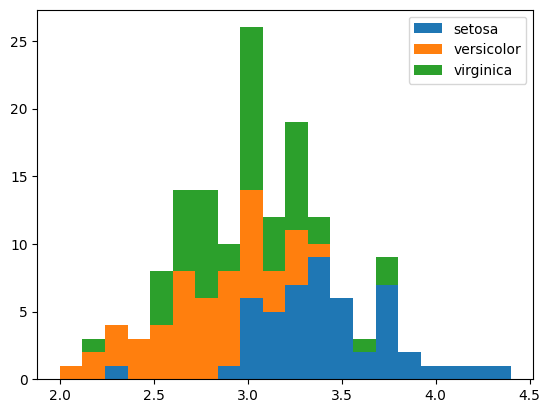

In [49]:

plt.hist(x=[df_iris.sepal_width[df_iris['species_encoded'] == 0],
            df_iris.sepal_width[df_iris['species_encoded'] == 1],
            df_iris.sepal_width[df_iris['species_encoded'] == 2]
            ],
         histtype='barstacked',
         label=['setosa', 'versicolor', 'virginica'],
         bins=20)

plt.legend()

In [50]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,0.067797,0.041667,Iris-setosa,0
1,4.9,3.0,0.067797,0.041667,Iris-setosa,0
2,4.7,3.2,0.050847,0.041667,Iris-setosa,0
3,4.6,3.1,0.084746,0.041667,Iris-setosa,0
4,5.0,3.6,0.067797,0.041667,Iris-setosa,0


In [51]:
#종별 sepal_length, sepal_width, petal_length, petal_width 평균값 구하기
df_iris_group = pd.read_csv('./data/iris3.csv')

df_iris_group.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [52]:
df_iris_group.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


<Axes: xlabel='species'>

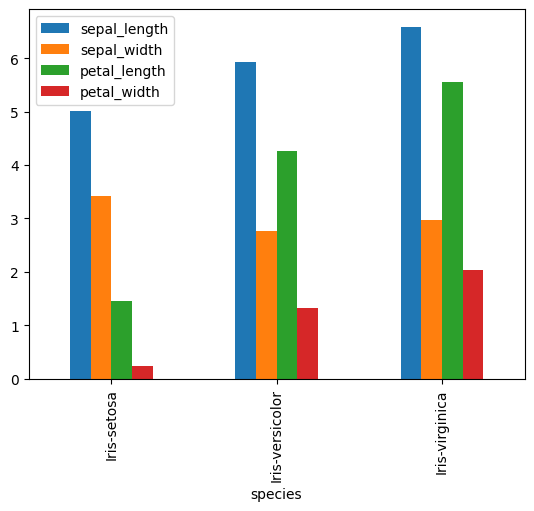

In [53]:
df_iris_group.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean().plot(kind='bar')


<Axes: xlabel='species'>

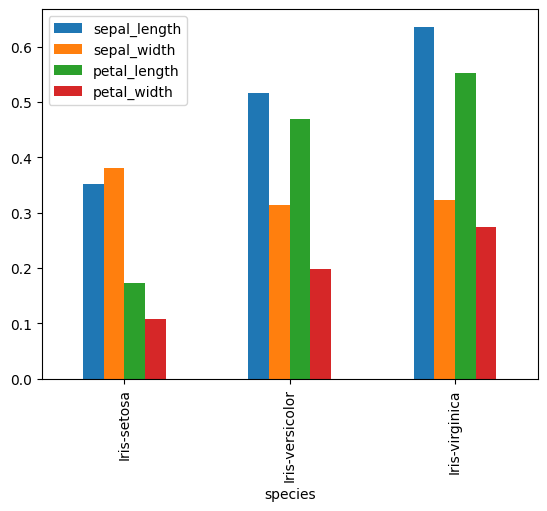

In [54]:
df_iris_group.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std().plot(kind='bar')


### 4. 산점도로 종별 분포 확인하기

/Users/nedstar/miniforge3/envs/tf-env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


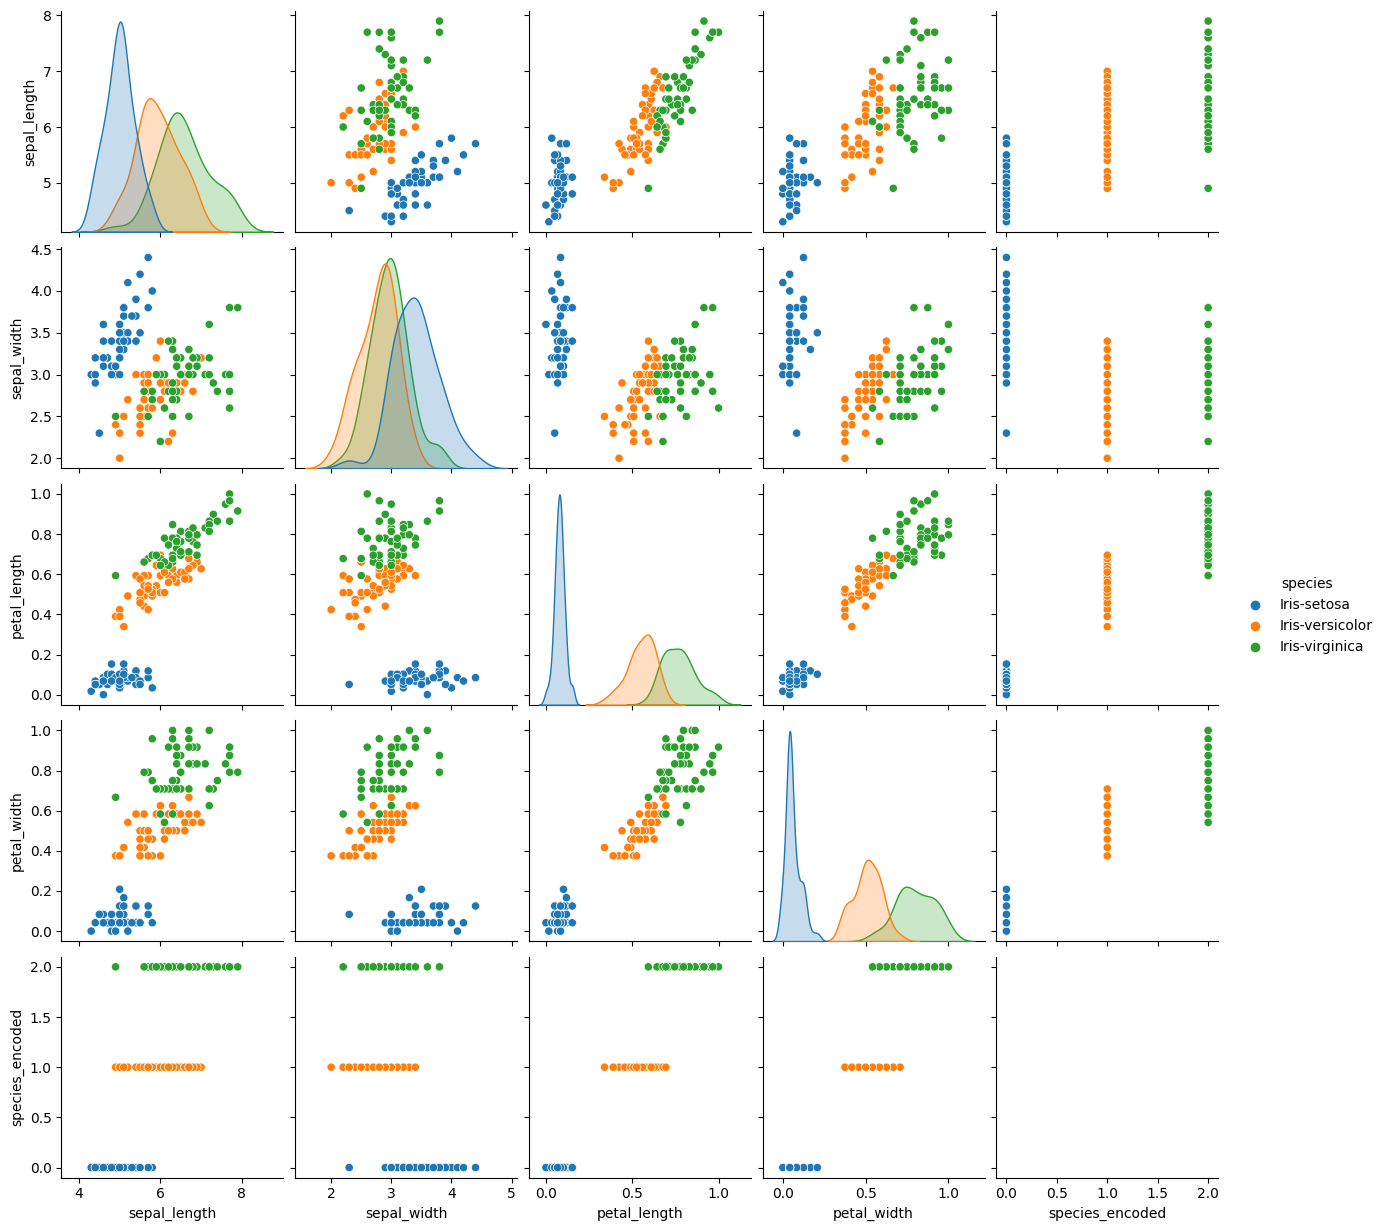

In [55]:
#산점도로 종별 분포 확인하기
sns.pairplot(df_iris, hue='species')
plt.show()

groupby 메소드로 종별 차이 알아보기

### 5. 딥러닝 모델을 사용하여 붓꽃의 종(species) 예측하기

In [56]:
df_iris = pd.read_csv('./data/iris3.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


species 컬럼에 대한 원-핫 인코딩

In [57]:
df_iris = pd.get_dummies(df_iris, columns=['species'])
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [58]:
x = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris.iloc[:, -3:]
print(x.shape, y.shape)
y

(150, 4) (150, 3)


,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(3, activation='softmax', name='Output'))
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-10-04 11:04:41.383044: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-04 11:04:41.383410: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 4)                 20        
                                                                 
 Dense_2 (Dense)             (None, 8)                 40        
                                                                 
 Output (Dense)              (None, 3)                 27        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=20, batch_size=1)

Epoch 1/20


2023-10-04 11:04:42.218288: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-04 11:04:42.526571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 9s 45ms/step - loss: 4.5115 - accuracy: 0.3333
Epoch 2/20
150/150 [==============================] - 7s 45ms/step - loss: 2.0348 - accuracy: 0.2533
Epoch 3/20
150/150 [==============================] - 7s 45ms/step - loss: 1.5349 - accuracy: 0.1400
Epoch 4/20
150/150 [==============================] - 7s 45ms/step - loss: 1.2894 - accuracy: 0.1000
Epoch 5/20
150/150 [==============================] - 7s 45ms/step - loss: 1.1260 - accuracy: 0.1400
Epoch 6/20
150/150 [==============================] - 7s 45ms/step - loss: 1.0066 - accuracy: 0.0933
Epoch 7/20
150/150 [==============================] - 7s 45ms/step - loss: 0.8983 - accuracy: 0.1267
Epoch 8/20
150/150 [==============================] - 7s 45ms/step - loss: 0.8224 - accuracy: 0.4800
Epoch 9/20
150/150 [==============================] - 7s 46ms/step - loss: 0.7658 - accuracy: 0.5267
Epoch 10/20
150/150 [==============================] - 7s 48ms/step - loss: 0.7041 - accuracy: 0.6867


In [63]:
#모델 예측 결과 출력하기
print("\n Accuracy: %.4f" % (model.evaluate(x, y)[1]))

5/5 [==============================] - 0s 47ms/step - loss: 0.4810 - accuracy: 0.8400

 Accuracy: 0.8400


In [65]:
import numpy as np

y_pred = model.predict(x)
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max

5/5 [==============================] - 0s 4ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

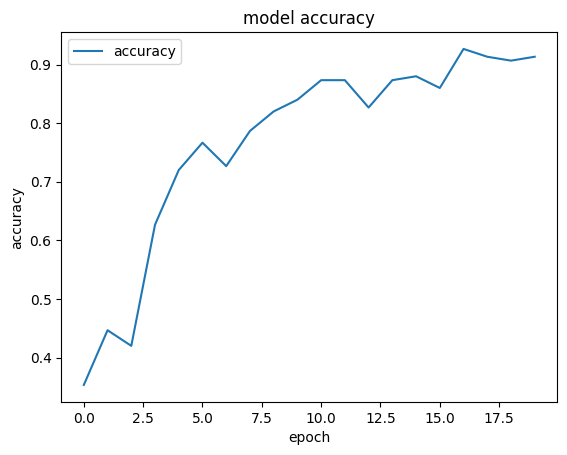

In [ ]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.legend(['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

### 6. 딥러닝 모델을 사용하여 꽃잎의 길이, 너비 예측하기

In [ ]:
df_iris = pd.read_csv('./data/iris3.csv')

df_iris['species_encoded'] = pd.factorize(df_iris['species'])[0]

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
x = df_iris[['sepal_length', 'sepal_width']]
y = df_iris[['petal_length', 'petal_width']]

In [ ]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='relu', name='Dense_1'))
model2.add(Dense(6, activation='relu', name='Dense_2'))
model2.add(Dense(12, activation='relu', name='Dense_3'))
model2.add(Dense(2, activation='linear', name='Output'))
model2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 2)                 6         
                                                                 
 Dense_2 (Dense)             (None, 6)                 18        
                                                                 
 Dense_3 (Dense)             (None, 12)                84        
                                                                 
 Output (Dense)              (None, 2)                 26        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10


2023-10-03 15:15:18.448304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 8ms/step - loss: 9.6222 - accuracy: 0.2867
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 7.7460 - accuracy: 0.3667
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 4.4301 - accuracy: 0.8933
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.9911 - accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4322 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4132 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4027 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 0.3902 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.3835 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 1.0000


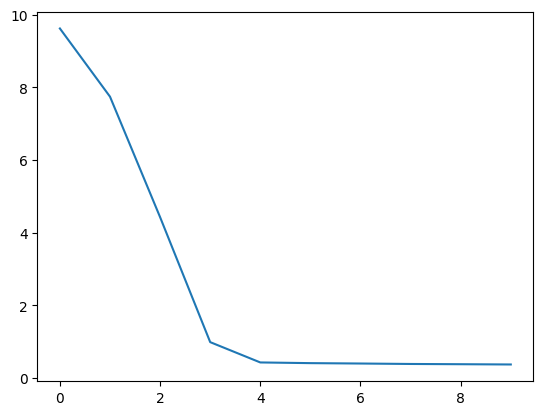

In [ ]:
model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x, y, epochs=10, batch_size=3)

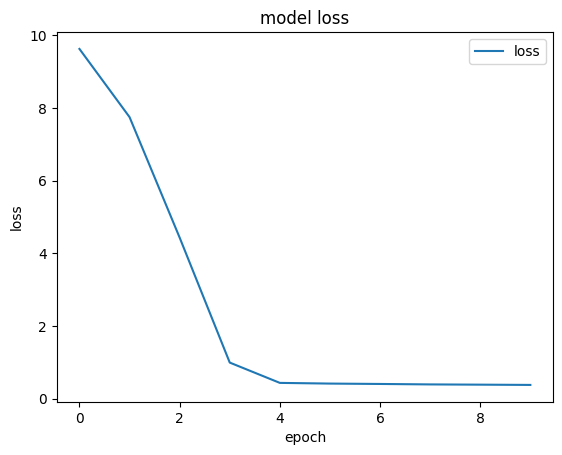

In [ ]:
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.legend(['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [ ]:
#새로운 데이터로 예측하기
new_x = [[1.5, 0.2, 0], [4.7, 1.4, 1], [5.4, 2.3, 2]]

y_predict = model2.predict(x)
y_predict

2023-10-03 15:15:32.496141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 68ms/step


array([[2.0396898 , 0.4635015 ],
       [2.5892634 , 0.69405776],
       [2.002046  , 0.44770926],
       [2.033235  , 0.46079367],
       [1.7460815 , 0.34032738],
       [1.7837244 , 0.35611933],
       [1.5460389 , 0.25640595],
       [2.0708785 , 0.4765857 ],
       [2.0956128 , 0.4869622 ],
       [2.426865  , 0.6259285 ],
       [2.1085222 , 0.49237794],
       [1.8084592 , 0.3664959 ],
       [2.4580536 , 0.6390129 ],
       [1.8020043 , 0.36378813],
       [2.1461658 , 0.5081701 ],
       [1.3653607 , 0.18060814],
       [1.7837244 , 0.35611933],
       [2.0396898 , 0.4635015 ],
       [2.339753  , 0.5893835 ],
       [1.5524943 , 0.25911397],
       [2.5957181 , 0.6967656 ],
       [1.7148924 , 0.32724303],
       [1.221242  , 0.12014763],
       [2.3644872 , 0.59976   ],
       [1.8084592 , 0.3664959 ],
       [2.720473  , 0.74910265],
       [2.0708785 , 0.4765857 ],
       [2.1708994 , 0.5185463 ],
       [2.3332977 , 0.5866754 ],
       [2.002046  , 0.44770926],
       [2.

전체 오차 값:  0.3712512972690126


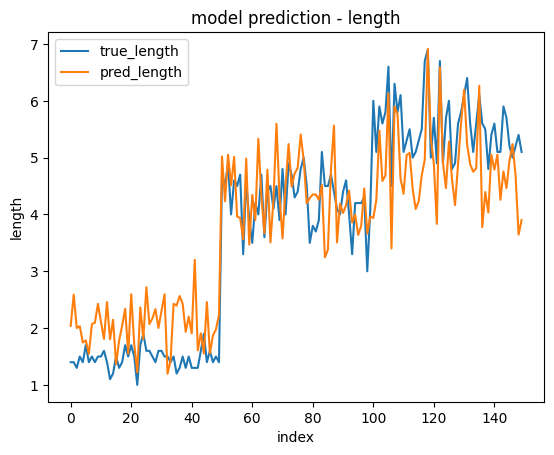

In [ ]:
#새로운 데이터 예측값 오차 계산하기

import numpy as np

df_iris['species_encoded'] = pd.factorize(df_iris['species'])[0]

print('전체 오차 값: ', np.mean((y_predict - y)**2))

#새로운 데이터 예측값 시각화하기
plt.plot(y['petal_length'], label=('true_length'))
plt.plot(y_predict[:, 0], label=('pred_length'))

plt.title('model prediction - length')
plt.xlabel('index')
plt.ylabel('length')

plt.legend()
plt.show()



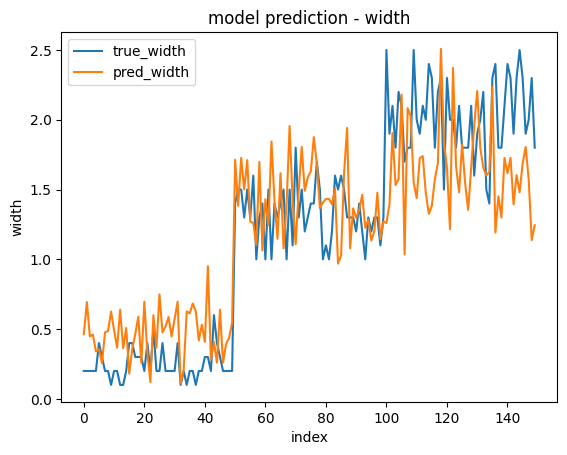

In [ ]:
#새로운 데이터 예측값 시각화하기
plt.plot(y['petal_width'], label=('true_width'))
plt.plot(y_predict[:, 1], label=('pred_width'))

plt.title('model prediction - width')
plt.xlabel('index')
plt.ylabel('width')

plt.legend()
plt.show()

종 클래스 데이터를 예측에 포함하였을 때의 차이

In [ ]:
df_iris = pd.get_dummies(df_iris, columns=['species'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,True,False,False
1,4.9,3.0,1.4,0.2,0,True,False,False
2,4.7,3.2,1.3,0.2,0,True,False,False
3,4.6,3.1,1.5,0.2,0,True,False,False
4,5.0,3.6,1.4,0.2,0,True,False,False


In [ ]:
x = df_iris[['sepal_length', 'sepal_width', 'species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]
y = df_iris[['petal_length', 'petal_width']]

In [ ]:
model = Sequential()

model.add(Dense(2, input_dim=5, activation='relu', name='Dense_1'))
model.add(Dense(6, activation='relu', name='Dense_2'))
model.add(Dense(12, activation='relu', name='Dense_3'))
model.add(Dense(2, activation='linear', name='Output'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# convert input data to integers
x = x.astype(int)

# fit the model
history = model.fit(x, y, epochs=10, batch_size=3)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 2)                 12        
                                                                 
 Dense_2 (Dense)             (None, 6)                 18        
                                                                 
 Dense_3 (Dense)             (None, 12)                84        
                                                                 
 Output (Dense)              (None, 2)                 26        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-10-03 15:16:28.245186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 8ms/step - loss: 9.8228 - accuracy: 0.2600
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 7.8509 - accuracy: 0.3733
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 4.6633 - accuracy: 0.8667
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 1.3070 - accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5905 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.5469 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5061 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4742 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4280 - accuracy: 1.0000


5/5 [==============================] - 0s 3ms/step
전체 오차 값:  0.4099054401538628


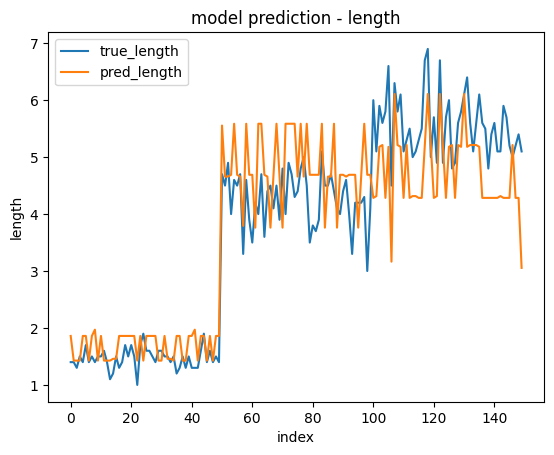

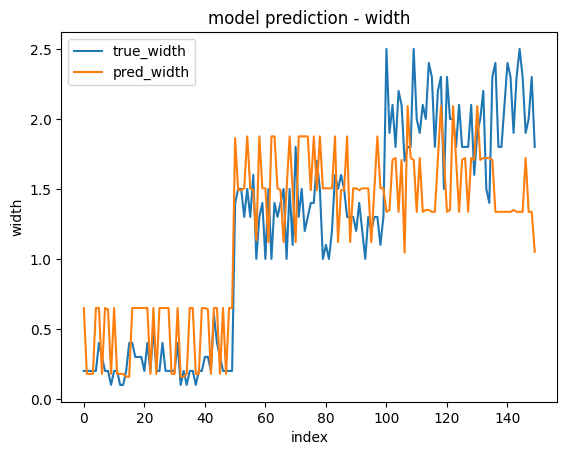

In [ ]:
#예측값 오차 계산하기
y_predict = model.predict(x)
y_predict

import numpy as np
print('전체 오차 값: ', np.mean((y_predict - y)**2))

#새로운 데이터 예측값 시각화하기
plt.plot(y['petal_length'], label=('true_length'))
plt.plot(y_predict[:, 0], label=('pred_length'))

plt.title('model prediction - length')
plt.xlabel('index')
plt.ylabel('length')

plt.legend()
plt.show()

#새로운 데이터 예측값 시각화하기
plt.plot(y['petal_width'], label=('true_width'))
plt.plot(y_predict[:, 1], label=('pred_width'))

plt.title('model prediction - width')
plt.xlabel('index')
plt.ylabel('width')

plt.legend()
plt.show()


훈련-검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

x = df_iris[['sepal_length', 'sepal_width']]
y = df_iris[['petal_length', 'petal_width']]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 2)                 6         
                                                                 
 Dense_2 (Dense)             (None, 6)                 18        
                                                                 
 Dense_3 (Dense)             (None, 12)                84        
                                                                 
 Output (Dense)              (None, 2)                 26        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


2023-10-03 21:10:24.471839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/40 [========================>.....] - ETA: 0s - loss: 10.0053 - accuracy: 0.2843 

2023-10-03 21:10:26.309006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 3s 26ms/step - loss: 9.6902 - accuracy: 0.3083 - val_loss: 9.8861 - val_accuracy: 0.3333
Epoch 2/500
40/40 [==============================] - 0s 8ms/step - loss: 8.3763 - accuracy: 0.3417 - val_loss: 8.2073 - val_accuracy: 0.3333
Epoch 3/500
40/40 [==============================] - 0s 8ms/step - loss: 6.3886 - accuracy: 0.6083 - val_loss: 5.2112 - val_accuracy: 0.9667
Epoch 4/500
40/40 [==============================] - 0s 9ms/step - loss: 3.1415 - accuracy: 1.0000 - val_loss: 1.5519 - val_accuracy: 1.0000
Epoch 5/500
40/40 [==============================] - 0s 9ms/step - loss: 0.7038 - accuracy: 1.0000 - val_loss: 0.4341 - val_accuracy: 1.0000
Epoch 6/500
40/40 [==============================] - 0s 8ms/step - loss: 0.4400 - accuracy: 1.0000 - val_loss: 0.4210 - val_accuracy: 1.0000
Epoch 7/500
40/40 [==============================] - 0s 11ms/step - loss: 0.4195 - accuracy: 1.0000 - val_loss: 0.4091 - val_accuracy: 1.0000
Epoch 8/500
40/40 [====

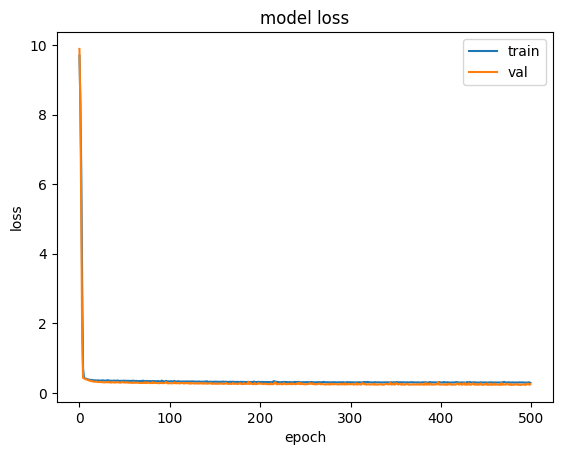

In [ ]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='relu', name='Dense_1'))
model2.add(Dense(6, activation='relu', name='Dense_2'))
model2.add(Dense(12, activation='relu', name='Dense_3'))
model2.add(Dense(2, activation='linear', name='Output'))
model2.summary()

model_split = model2
model_split.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history_split = model_split.fit(x_train, y_train, epochs=500, batch_size=3, validation_data=(x_val, y_val))

plt.plot(history_split.history['loss'])
plt.plot(history_split.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()